In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_new = pd.read_csv("outliers.csv")
df_new

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,date,month,year,City_encoded
0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,1,1,2015,1
1,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,2,1,2015,1
2,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,3,1,2015,1
3,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,4,1,2015,1
4,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,5,1,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,27,6,2020,26
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,28,6,2020,26
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,29,6,2020,26
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,30,6,2020,26


In [3]:
df_new.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'AQI', 'date', 'month', 'year', 'City_encoded'],
      dtype='object')

In [5]:
df_new

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,date,month,year,City_encoded
0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,1,1,2015,1
1,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,2,1,2015,1
2,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,3,1,2015,1
3,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,4,1,2015,1
4,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,5,1,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,27,6,2020,26
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,28,6,2020,26
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,29,6,2020,26
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,30,6,2020,26


# Feature Selection And Transformation¶

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
corr = df_new.corr()
corr_target = abs(corr['AQI'])

In [8]:
# Select features with correlation greater than a threshold value
selected_features = corr_target[corr_target > 0.5]

In [9]:
print(selected_features)

PM2.5    0.633654
NO2      0.531952
CO       0.650475
AQI      1.000000
Name: AQI, dtype: float64


# Using SelectKBest chi2

In [10]:
df_new

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,date,month,year,City_encoded
0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,1,1,2015,1
1,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,2,1,2015,1
2,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,3,1,2015,1
3,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,4,1,2015,1
4,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,5,1,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,27,6,2020,26
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,28,6,2020,26
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,29,6,2020,26
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,30,6,2020,26


In [11]:
X = df_new.drop('AQI',axis=1)
y = df_new['AQI']

In [12]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [13]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [14]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 

In [15]:
featureScores

,Specs,Score
0,PM2.5,1.081326e+06
1,PM10,6.170207e+05
2,NO,2.229198e+05
3,NO2,2.099120e+05
4,NOx,2.130609e+05
...,...,...
10,Toluene,1.996180e+05
11,date,4.425789e+03
12,month,2.561718e+03
13,year,5.595382e+00


In [16]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

      Specs         Score
0     PM2.5  1.081326e+06
1      PM10  6.170207e+05
6        CO  4.462332e+05
2        NO  2.229198e+05
4       NOx  2.130609e+05
3       NO2  2.099120e+05
10  Toluene  1.996180e+05
7       SO2  1.910119e+05
8        O3  4.971259e+04
9   Benzene  4.879433e+04


# Correlation Matrix with Heatmap

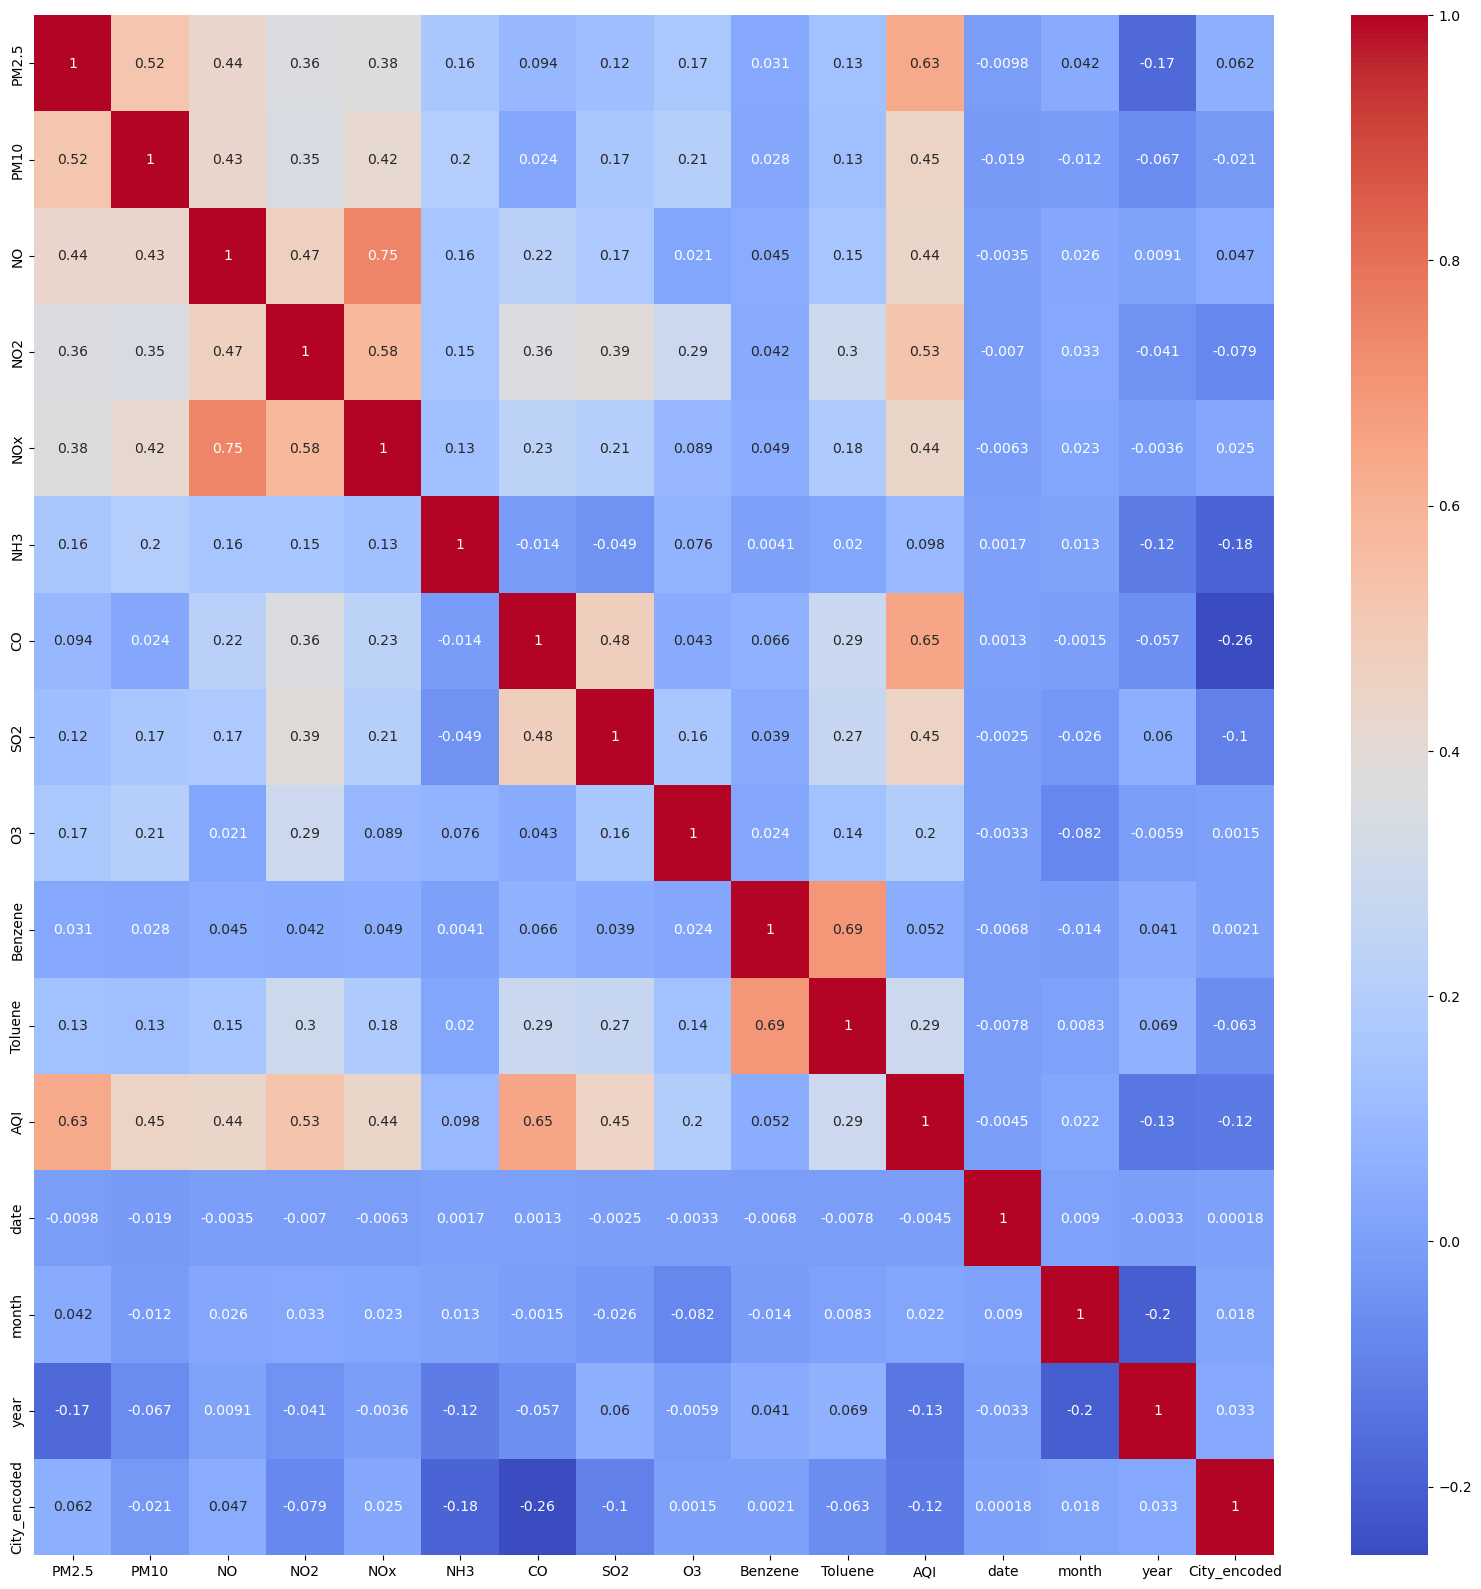

In [17]:
plt.figure(figsize=(20,20))

corr_matrix = df_new.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

# Show the plot
plt.show()

# Embedded Method (Lasso Regression)


In [18]:
from sklearn.linear_model import LassoCV

In [19]:
# Use LassoCV for feature selection
model = LassoCV(cv=5)
model.fit(X, y)

# Display selected features
print("Selected Features: %s" % np.where(model.coef_ != 0)[0])

Selected Features: [ 0  1  2  3  4  5  6  7  8  9 10]


# Model Creation

In [20]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

In [21]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((23624, 15), (5907, 15))

## Create an Evaluate Function to give all metrics after model Training

In [22]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 60.3036
- Mean Absolute Error: 30.4939
- R2 Score: 0.7906
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 54.4260
- Mean Absolute Error: 29.7420
- R2 Score: 0.8076


Lasso
Model performance for Training set
- Root Mean Squared Error: 60.3082
- Mean Absolute Error: 30.5444
- R2 Score: 0.7905
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 54.4354
- Mean Absolute Error: 29.7886
- R2 Score: 0.8075


Ridge
Model performance for Training set
- Root Mean Squared Error: 60.3036
- Mean Absolute Error: 30.4939
- R2 Score: 0.7906
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 54.4260
- Mean Absolute Error: 29.7420
- R2 Score: 0.8076


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 41.9430
- Mean Absolute Error: 18.4372
- R2 Score: 0.8987
---------

# Function That Evaluates The Model

In [24]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_lr)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_lr)}")
print(f"Root mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_lr))}")
print(f"Score = {lr.score(X_test,y_test)}")

Mean Absolute Error = 29.741988710616432
Mean Squared Error = 2962.1908130479733
Root mean Squared Error = 54.42601228317185
Score = 0.8075807600287128


In [27]:
test_model(lr)

[0.7863651238636633]

# 1. Scatter plot with regression line

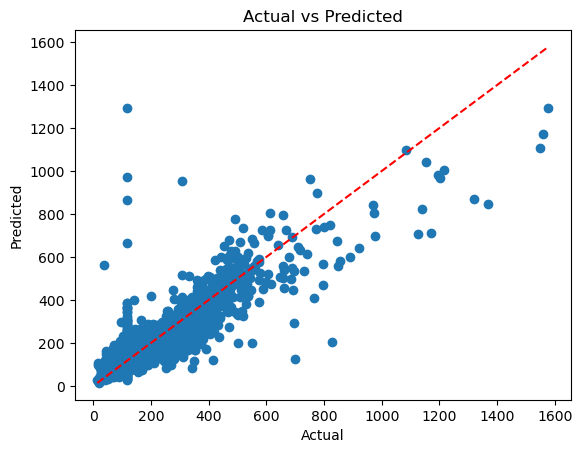

In [28]:
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# 2. Residual plot

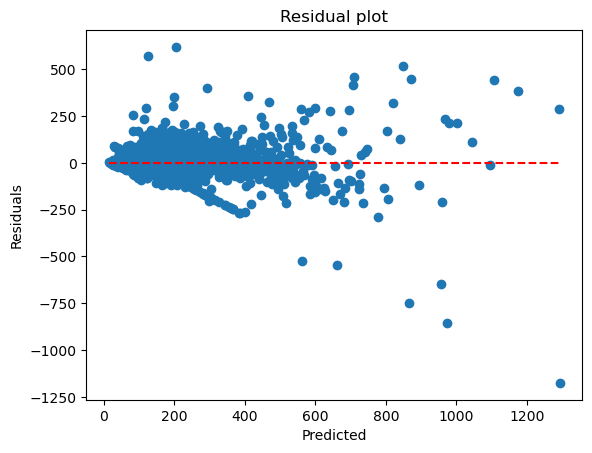

In [29]:
residuals = y_test - y_pred_lr

plt.scatter(y_pred_lr, residuals)
plt.plot([y_pred_lr.min(), y_pred_lr.max()], [0, 0], '--r')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

# 3. Distribution plot

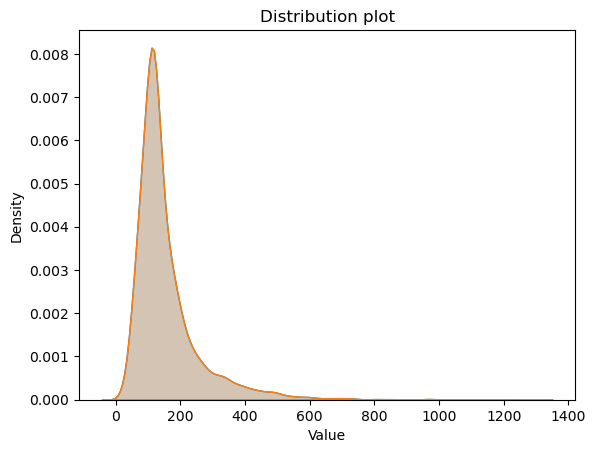

In [30]:
sns.kdeplot(y_pred_lr, label='Actual', shade=True)
sns.kdeplot(y_pred_lr, label='Predicted', shade=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution plot')
plt.show()

# 4.Feature importance plot

In [31]:
X.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'date', 'month', 'year', 'City_encoded'],
      dtype='object')

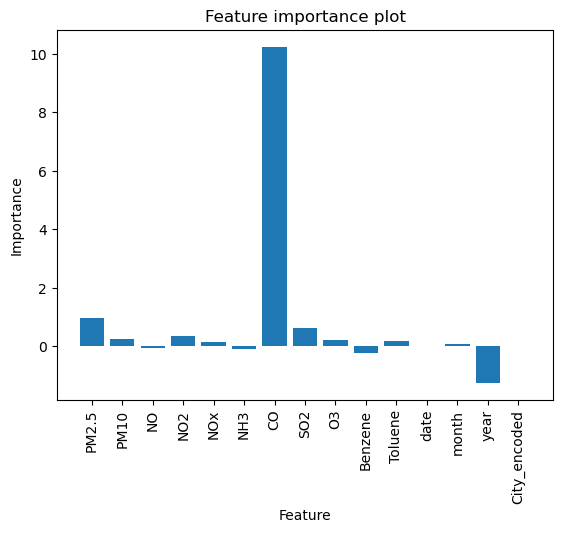

In [32]:
importance = lr.coef_

plt.bar(X.columns, importance)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature importance plot')
plt.show()

# 4.1 Permutation Importance Plot:

In [33]:
# !pip install eli5

In [34]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.4966 ± 0.0127,CO
0.4462 ± 0.0282,PM2.5
0.0466 ± 0.0012,PM10
0.0139 ± 0.0023,SO2
0.0100 ± 0.0008,NO2
0.0027 ± 0.0007,O3
0.0017 ± 0.0001,Toluene
0.0017 ± 0.0005,NOx
0.0007 ± 0.0003,year
0.0005 ± 0.0002,Benzene


# 4.2 Partial Dependence Plot:

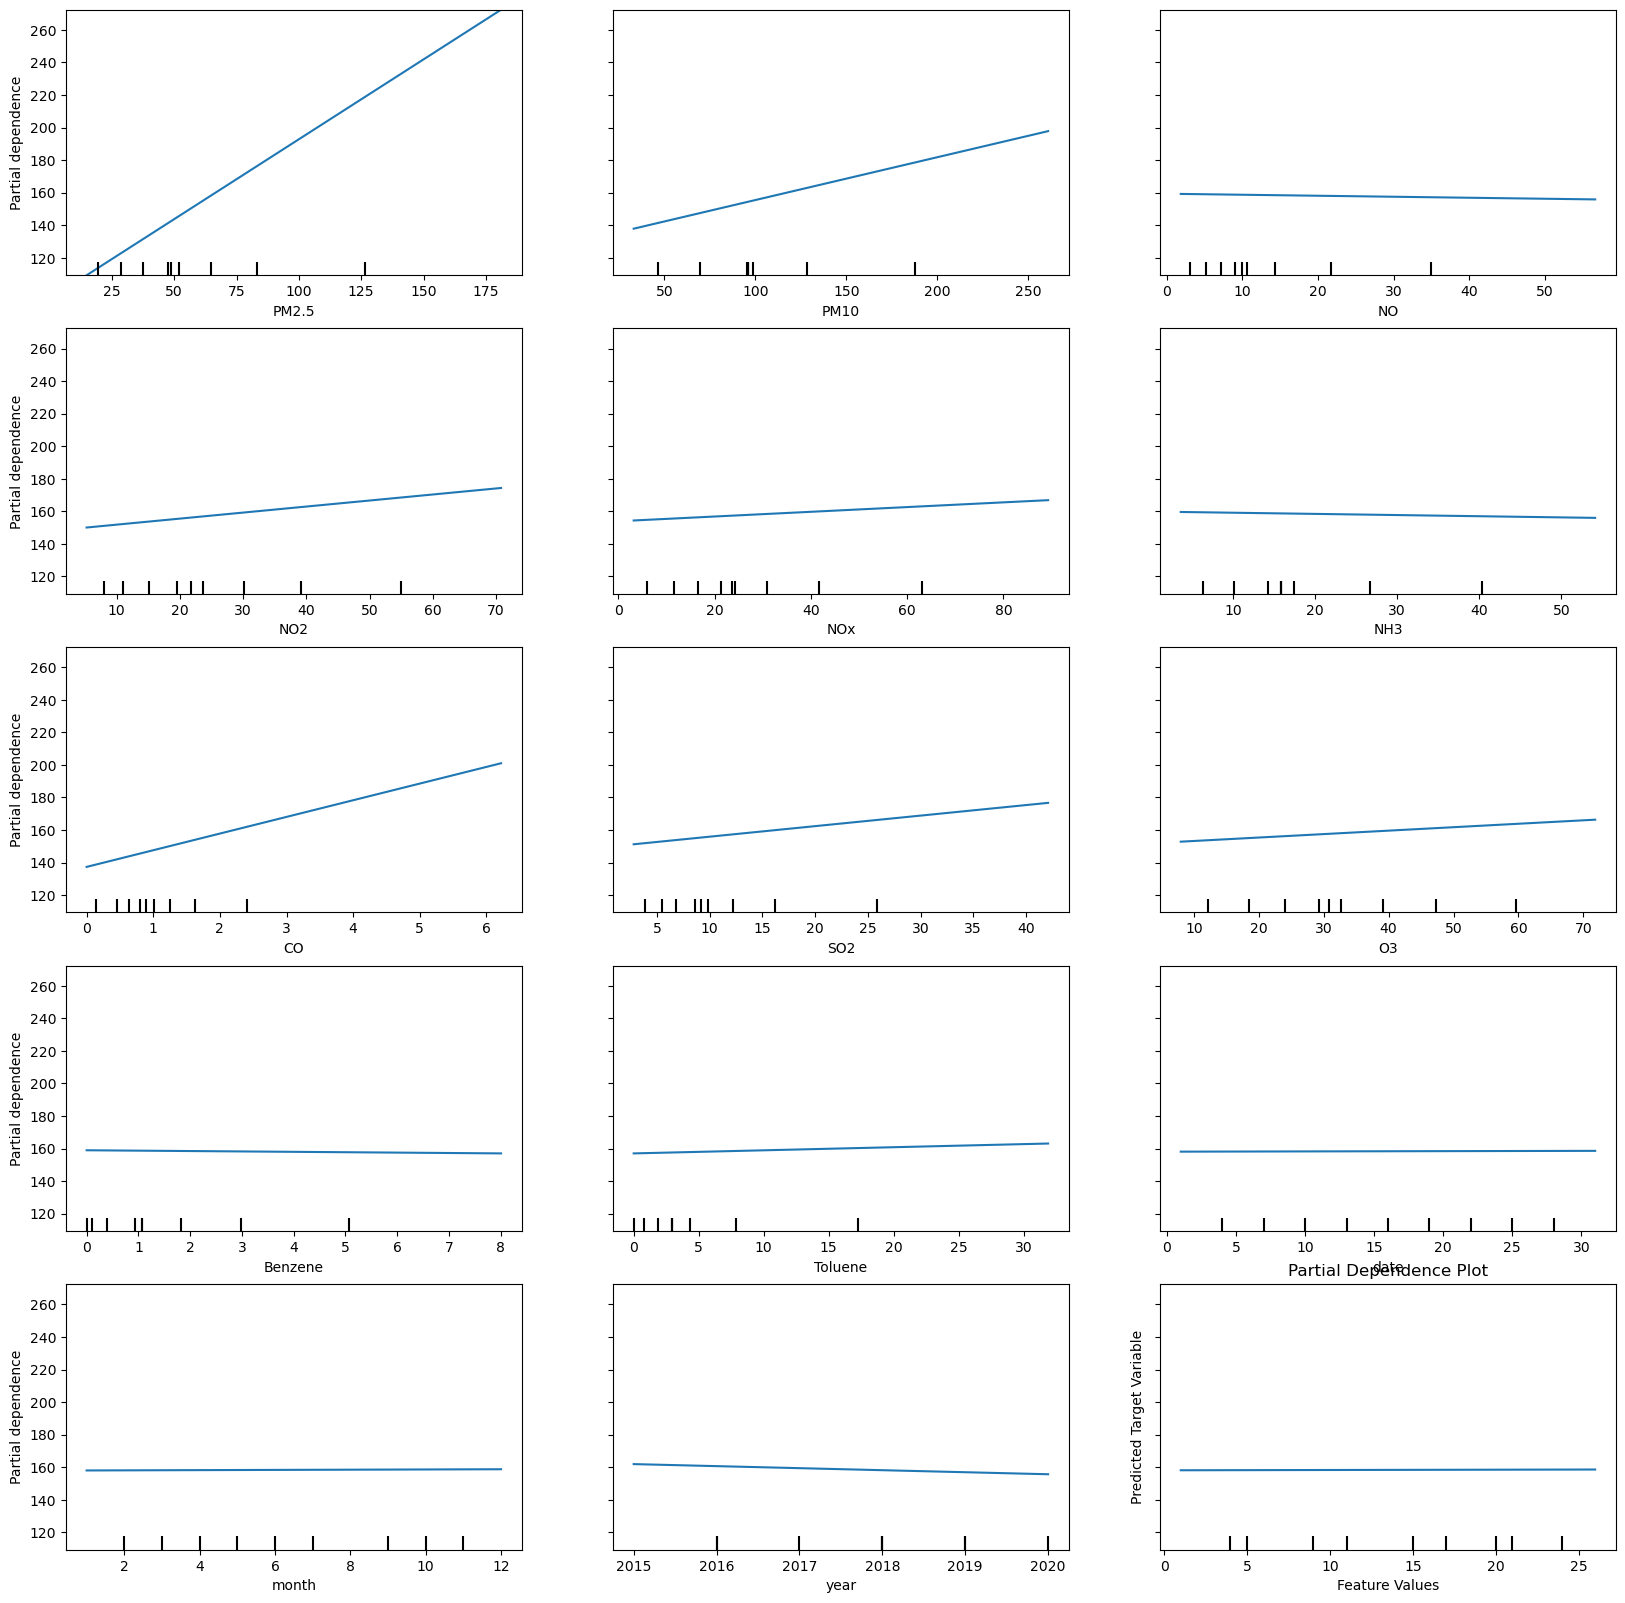

In [35]:
from sklearn.inspection import plot_partial_dependence

# Define the features to plot
features_to_plot = X_test.columns.tolist()

fig, ax = plt.subplots(figsize=(20, 20))

# Generate the partial dependence plot
plot_partial_dependence(lr, X_test, features_to_plot, target='AQI', ax=ax)

# Add labels and a title to the plot
plt.xlabel('Feature Values')
plt.ylabel('Predicted Target Variable')
plt.title('Partial Dependence Plot')

plt.show()


# 4.3 Recursive Feature Elimination Plot

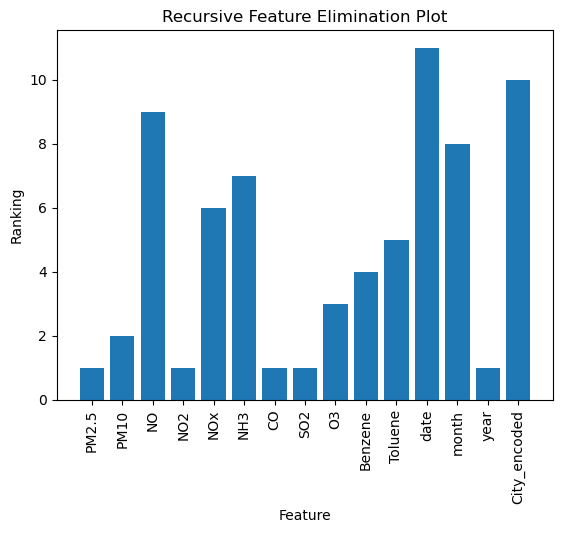

In [36]:
from sklearn.feature_selection import RFE

rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X_train, y_train)

importance = rfe.ranking_

plt.bar(X.columns, importance)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Ranking')
plt.title('Recursive Feature Elimination Plot')
plt.show()

In [37]:
# Plot actual vs predicted values for Decision Tree Regressor
plt.scatter(y_test, y_pred_dt_reg, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regressor')

# Plot actual vs predicted values for Linear Regression
plt.scatter(y_test, y_pred_lr, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

plt.show()

NameError: name 'y_pred_dt_reg' is not defined

# Lasso Regression

In [38]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)

print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_lasso)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_lasso)}")
print(f"Root mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_lasso))}")
print(f"Score = {lasso.score(X_test,y_test)}")

Mean Absolute Error = 30.281827405650365
Mean Squared Error = 2031.4614577192933
Root mean Squared Error = 45.071736795017046
Score = 0.8020560991634758


In [39]:
test_model(lasso)

[0.7953423790139297]

# Ridge Regression

In [40]:
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.predict(X_test)

print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_ridge)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_ridge)}")
print(f"Root mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_ridge))}")
print(f"Score = {ridge.score(X_test,y_test)}")

Mean Absolute Error = 30.381395150974054
Mean Squared Error = 2033.630021695737
Root mean Squared Error = 45.09578718345802
Score = 0.8018447961081903


In [41]:
test_model(ridge)

[0.7955239804957687]

# ElasticNet Regression

In [122]:
ea = ElasticNet()
ea.fit(X_train,y_train)
y_pred_ea = ea.predict(X_test)

print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_ea)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_ea)}")
print(f"Root mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_ea))}")
print(f"Score = {ea.score(X_test,y_test)}")

Mean Absolute Error = 30.396386980821763
Mean Squared Error = 2081.2355002429817
Root mean Squared Error = 45.62056006060186
Score = 0.7972061582009713


In [123]:
test_model(ea)

[0.7872497317715462]

# Support Vector Regressor

In [38]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)

print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_svr)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_svr)}")
print(f"Root mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_svr))}")
print(f"Score = {svr.score(X_test,y_test)}")

Mean Absolute Error = 29.669592591686953
Mean Squared Error = 3107.334255714008
Root mean Squared Error = 55.74346827848092
Score = 0.7981524710739316


In [125]:
test_model(svr)

[0.7824456831255361]

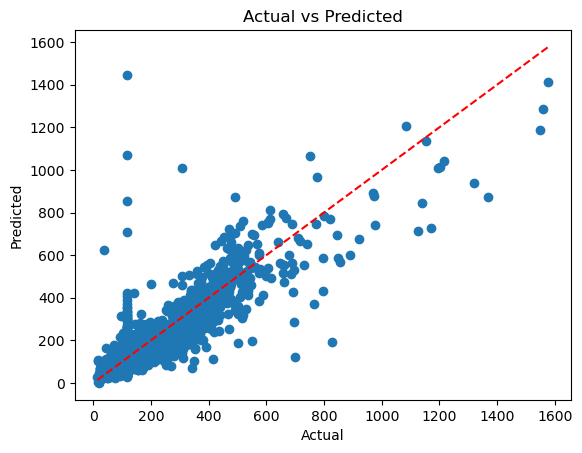

In [39]:
plt.scatter(y_test, y_pred_svr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

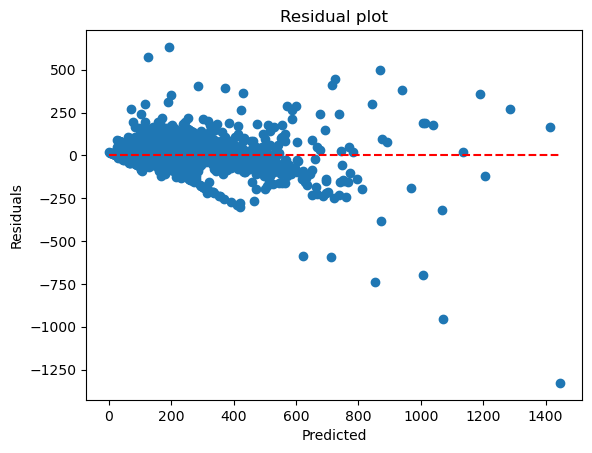

In [40]:
residuals = y_test - y_pred_svr

plt.scatter(y_pred_svr, residuals)
plt.plot([y_pred_svr.min(), y_pred_svr.max()], [0, 0], '--r')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

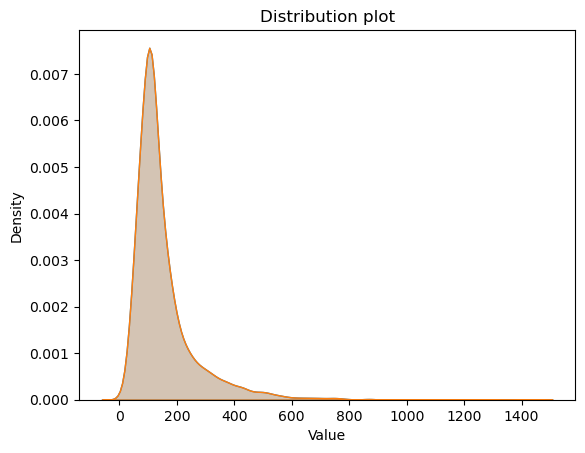

In [41]:
sns.kdeplot(y_pred_svr, label='Actual', shade=True)
sns.kdeplot(y_pred_svr, label='Predicted', shade=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution plot')
plt.show()

In [42]:
perm = PermutationImportance(svr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.6306 ± 0.0167,CO
0.5385 ± 0.0335,PM2.5
0.0379 ± 0.0018,PM10
0.0074 ± 0.0018,SO2
0.0035 ± 0.0005,NO2
0.0029 ± 0.0010,City_encoded
0.0015 ± 0.0003,O3
0.0002 ± 0.0001,Toluene
0.0002 ± 0.0001,date
0.0002 ± 0.0001,Benzene


# K-Nearest Neighbour(KNN) Regression

In [130]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_knn)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_knn)}")
print(f"Root mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_knn))}")
print(f"Score = {knn.score(X_test,y_test)}")

Mean Absolute Error = 20.592415777890636
Mean Squared Error = 1300.1672388691384
Root mean Squared Error = 36.0578318658948
Score = 0.8733127945776797


In [131]:
test_model(knn)

[0.8600783192272194]

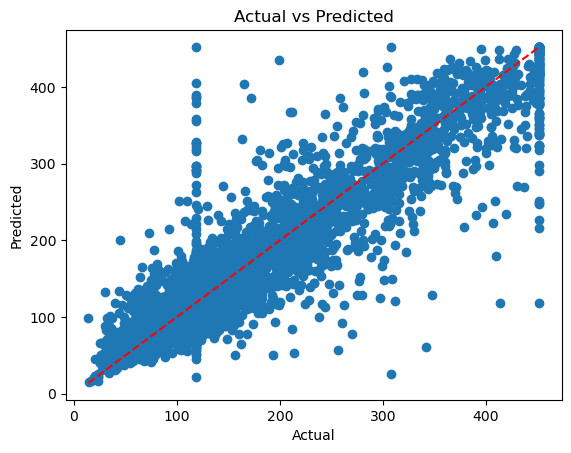

In [132]:
plt.scatter(y_test, y_pred_knn)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

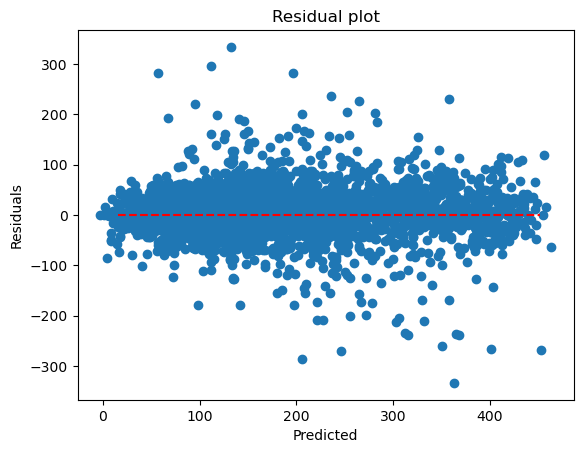

In [133]:
residuals = y_test - y_pred_knn

plt.scatter(y_pred_svr, residuals)
plt.plot([y_pred_knn.min(), y_pred_knn.max()], [0, 0], '--r')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

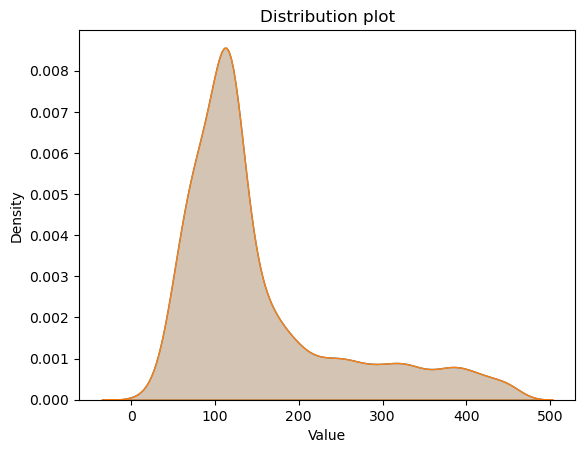

In [134]:
sns.kdeplot(y_pred_knn, label='Actual', shade=True)
sns.kdeplot(y_pred_knn, label='Predicted', shade=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution plot')
plt.show()

In [135]:
perm = PermutationImportance(knn, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.7898 ± 0.0440,PM2.5
0.2346 ± 0.0195,PM10
0.0639 ± 0.0047,NO2
0.0545 ± 0.0106,NOx
0.0456 ± 0.0087,City_encoded
0.0424 ± 0.0059,SO2
0.0327 ± 0.0047,O3
0.0194 ± 0.0040,NH3
0.0194 ± 0.0034,NO
0.0094 ± 0.0033,Toluene


# Decision Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=21)
dt_reg.fit(X_train,y_train)
y_pred_dt_reg = dt_reg.predict(X_test)

print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_dt_reg)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_dt_reg)}")
print(f"Root mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_dt_reg))}")
print(f"Score = {dt_reg.score(X_test,y_test)}")

Mean Absolute Error = 28.63297782292196
Mean Squared Error = 3778.8472998137804
Root mean Squared Error = 61.47232954601428
Score = 0.7545320435824527


In [53]:
test_model(dt_reg)

[0.7553750908919633]

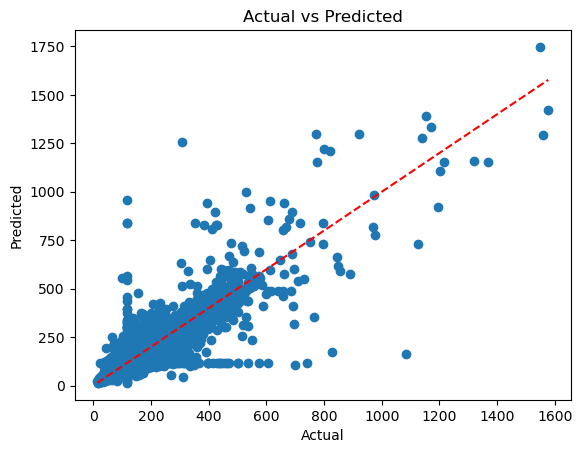

In [54]:
plt.scatter(y_test, y_pred_dt_reg)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

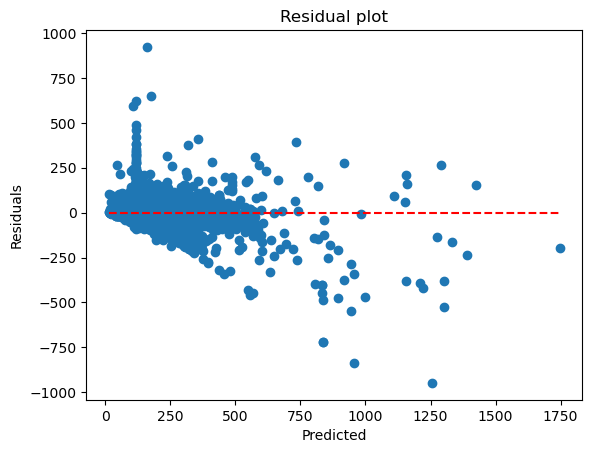

In [55]:
residuals = y_test - y_pred_dt_reg

plt.scatter(y_pred_dt_reg, residuals)
plt.plot([y_pred_dt_reg.min(), y_pred_dt_reg.max()], [0, 0], '--r')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

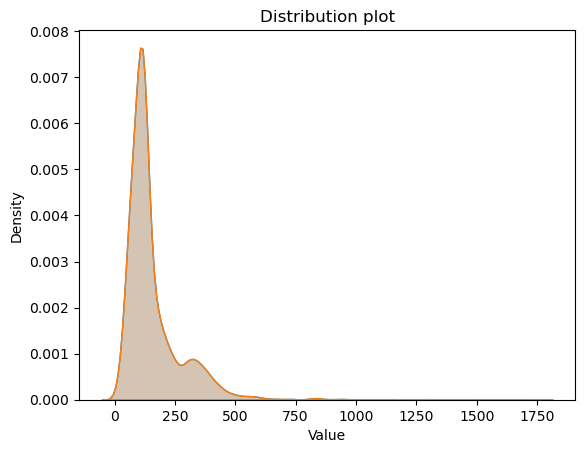

In [56]:
sns.kdeplot(y_pred_dt_reg, label='Actual', shade=True)
sns.kdeplot(y_pred_dt_reg, label='Predicted', shade=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution plot')
plt.show()

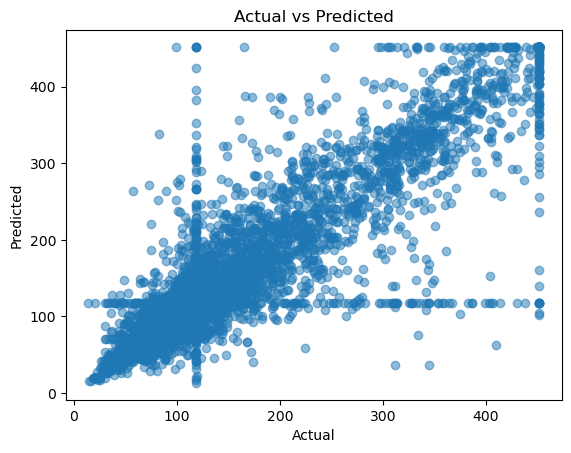

In [75]:
plt.scatter(y_test, y_pred_dt_reg, alpha = 0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# RandomForestRegressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred_reg_rf = reg_rf.predict(X_test)

print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_reg_rf)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_reg_rf)}")
print(f"Root mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_reg_rf))}")
print(f"Score = {reg_rf.score(X_test,y_test)}")

Mean Absolute Error = 17.95860504486203
Mean Squared Error = 1031.0575504994074
Root mean Squared Error = 32.11008487219253
Score = 0.8995346169343836


In [45]:
test_model(reg_rf)

[0.8945462557602584]

In [46]:
reg_rf.score(X_train, y_train)

0.985913587993234

In [47]:
reg_rf.score(X_test, y_test)

0.8995346169343836

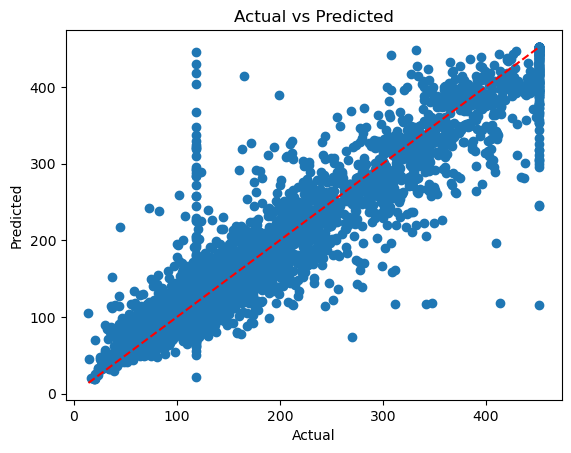

In [76]:
plt.scatter(y_test, y_pred_reg_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

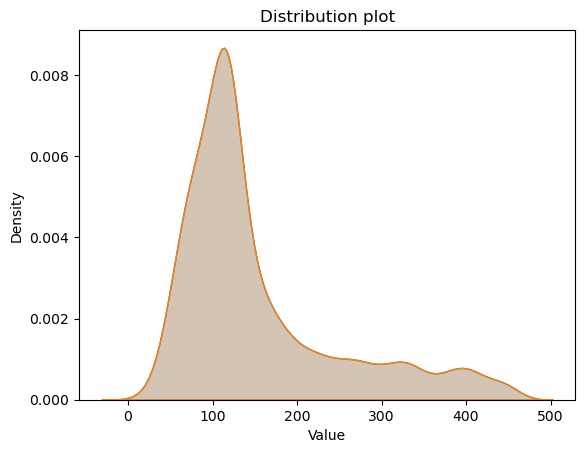

In [77]:
sns.kdeplot(y_pred_reg_rf, label='Actual', shade=True)
sns.kdeplot(y_pred_reg_rf, label='Predicted', shade=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution plot')
plt.show()

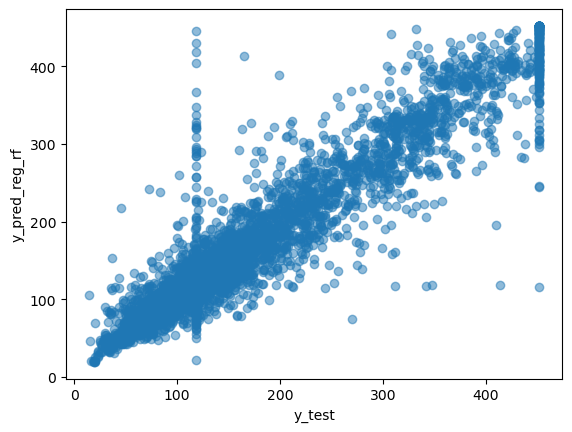

In [78]:
plt.scatter(y_test, y_pred_reg_rf, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_reg_rf")
plt.show()

In [50]:
from sklearn import metrics

In [52]:
metrics.r2_score(y_test, y_pred_reg_rf)

0.8995346169343836

# Hyperparameter Tuning


In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [81]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [82]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [83]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  17.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  17.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  27.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  27.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [84]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [85]:
y_pred_rf_random = rf_random.predict(X_test)

In [95]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf_random))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf_random))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf_random)))
#print(f"Score = {rf_random.score(X_test,y_test)}")
#{reg_rf.score(X_test,y_test)}
print(f'R Score:', metrics.r2_score(y_test, y_pred_rf_random))

MAE: 17.578895736036806
MSE: 942.589340966521
RMSE: 30.701617888419513
R2 Score: 0.9081548850809538


In [88]:
test_model(rf_random)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  17.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  17.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  26.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  26.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  26.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  45.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  45.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  45.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  45.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  45.2s
[CV] END max_depth=25, max_features

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   4.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   4.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   4.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   4.8s
[CV] END max_depth=5, max_features=

[0.9009183151393962]

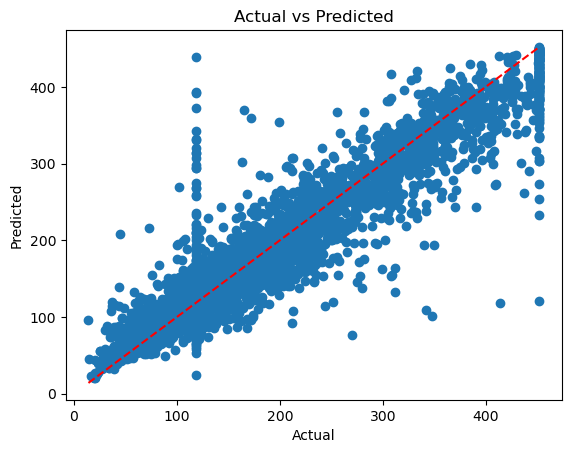

In [96]:
plt.scatter(y_test, y_pred_rf_random)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

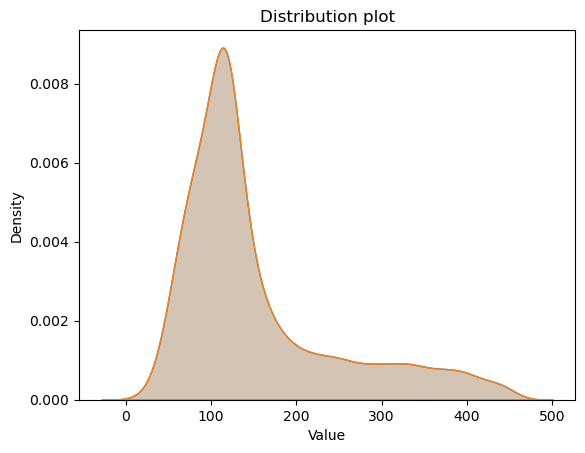

In [97]:
sns.kdeplot(y_pred_rf_random, label='Actual', shade=True)
sns.kdeplot(y_pred_rf_random, label='Predicted', shade=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution plot')
plt.show()

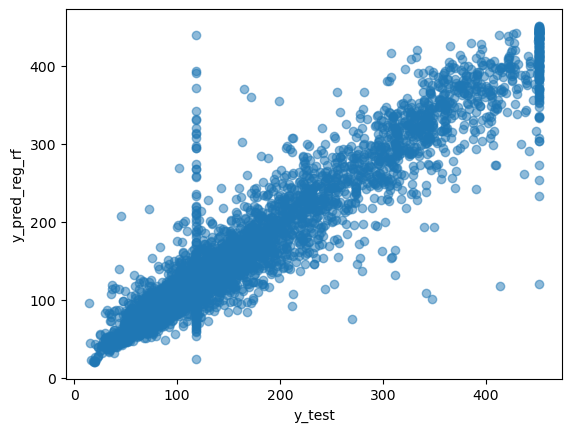

In [98]:
plt.scatter(y_test, y_pred_rf_random, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_reg_rf")
plt.show()

# XGBoost Regressor

In [45]:
from xgboost import XGBRegressor

xg = XGBRegressor()
xg.fit(X_train,y_train)
y_pred_xg = xg.predict(X_test)

print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_xg)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_xg)}")
print(f"Root mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_xg))}")
print(f"Score = {xg.score(X_test,y_test)}")

Mean Absolute Error = 20.458488069776152
Mean Squared Error = 1760.939402260015
Root mean Squared Error = 41.96354849461631
Score = 0.8856121557308748


In [46]:
test_model(xg)

[0.8493972531257664]

# AdaBoost Regressor

In [138]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_ada)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_ada)}")
print(f"Root mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_ada))}")
print(f"Score = {ada.score(X_test,y_test)}")

Mean Absolute Error = 44.16784583268295
Mean Squared Error = 3069.024729833626
Root mean Squared Error = 55.39877913667075
Score = 0.7009568040394636


In [139]:
test_model(ada)

[0.7019534942164848]

# CatBoost Regressor

In [140]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 4.5 MB/s eta 0:00:00m eta 0:00:010:00:01m
Note: you may need to restart the kernel to use updated packages.


In [47]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor()
cb.fit(X_train, y_train)
y_pred_cb = cb.predict(X_test)

Learning rate set to 0.067479
0:	learn: 125.4758745	total: 64.1ms	remaining: 1m 4s
1:	learn: 119.6183743	total: 71.2ms	remaining: 35.5s
2:	learn: 113.9544596	total: 78.5ms	remaining: 26.1s
3:	learn: 108.6384808	total: 84.9ms	remaining: 21.1s
4:	learn: 103.8619692	total: 89.5ms	remaining: 17.8s
5:	learn: 99.3539494	total: 93.3ms	remaining: 15.5s
6:	learn: 95.1690679	total: 96.5ms	remaining: 13.7s
7:	learn: 91.2316984	total: 99.4ms	remaining: 12.3s
8:	learn: 87.9053293	total: 102ms	remaining: 11.2s
9:	learn: 84.5673795	total: 105ms	remaining: 10.4s
10:	learn: 81.4461308	total: 107ms	remaining: 9.61s
11:	learn: 78.5882599	total: 109ms	remaining: 8.99s
12:	learn: 75.9748128	total: 111ms	remaining: 8.45s
13:	learn: 73.5445979	total: 113ms	remaining: 7.98s
14:	learn: 71.2780009	total: 115ms	remaining: 7.58s
15:	learn: 69.1744790	total: 118ms	remaining: 7.23s
16:	learn: 67.3135329	total: 120ms	remaining: 6.92s
17:	learn: 65.6408069	total: 122ms	remaining: 6.65s
18:	learn: 64.0464542	total: 12

216:	learn: 37.1325684	total: 581ms	remaining: 2.09s
217:	learn: 37.0823547	total: 584ms	remaining: 2.09s
218:	learn: 37.0595941	total: 586ms	remaining: 2.09s
219:	learn: 37.0319026	total: 589ms	remaining: 2.09s
220:	learn: 37.0026705	total: 591ms	remaining: 2.08s
221:	learn: 36.9757753	total: 594ms	remaining: 2.08s
222:	learn: 36.9501519	total: 597ms	remaining: 2.08s
223:	learn: 36.9256484	total: 602ms	remaining: 2.09s
224:	learn: 36.8794359	total: 605ms	remaining: 2.08s
225:	learn: 36.8400599	total: 607ms	remaining: 2.08s
226:	learn: 36.7899995	total: 609ms	remaining: 2.07s
227:	learn: 36.7662120	total: 611ms	remaining: 2.07s
228:	learn: 36.7489481	total: 613ms	remaining: 2.06s
229:	learn: 36.7246773	total: 616ms	remaining: 2.06s
230:	learn: 36.7012201	total: 618ms	remaining: 2.06s
231:	learn: 36.6736628	total: 620ms	remaining: 2.05s
232:	learn: 36.6482058	total: 622ms	remaining: 2.05s
233:	learn: 36.6194377	total: 624ms	remaining: 2.04s
234:	learn: 36.5730895	total: 626ms	remaining:

387:	learn: 32.9910148	total: 977ms	remaining: 1.54s
388:	learn: 32.9750527	total: 980ms	remaining: 1.54s
389:	learn: 32.9670064	total: 982ms	remaining: 1.54s
390:	learn: 32.9453049	total: 985ms	remaining: 1.53s
391:	learn: 32.9245000	total: 987ms	remaining: 1.53s
392:	learn: 32.9070588	total: 989ms	remaining: 1.53s
393:	learn: 32.8918794	total: 991ms	remaining: 1.52s
394:	learn: 32.8693783	total: 994ms	remaining: 1.52s
395:	learn: 32.8619081	total: 996ms	remaining: 1.52s
396:	learn: 32.8504031	total: 999ms	remaining: 1.52s
397:	learn: 32.8296855	total: 1s	remaining: 1.52s
398:	learn: 32.8067216	total: 1.01s	remaining: 1.52s
399:	learn: 32.7852607	total: 1.01s	remaining: 1.51s
400:	learn: 32.7704178	total: 1.01s	remaining: 1.51s
401:	learn: 32.7601854	total: 1.01s	remaining: 1.51s
402:	learn: 32.7329472	total: 1.02s	remaining: 1.51s
403:	learn: 32.7067324	total: 1.02s	remaining: 1.5s
404:	learn: 32.6958116	total: 1.02s	remaining: 1.5s
405:	learn: 32.6772226	total: 1.02s	remaining: 1.5s

557:	learn: 30.4913337	total: 1.37s	remaining: 1.09s
558:	learn: 30.4785568	total: 1.37s	remaining: 1.08s
559:	learn: 30.4707741	total: 1.38s	remaining: 1.08s
560:	learn: 30.4580975	total: 1.38s	remaining: 1.08s
561:	learn: 30.4378903	total: 1.38s	remaining: 1.08s
562:	learn: 30.4312522	total: 1.39s	remaining: 1.08s
563:	learn: 30.4040901	total: 1.39s	remaining: 1.07s
564:	learn: 30.3943148	total: 1.39s	remaining: 1.07s
565:	learn: 30.3831734	total: 1.4s	remaining: 1.07s
566:	learn: 30.3717297	total: 1.4s	remaining: 1.07s
567:	learn: 30.3535098	total: 1.4s	remaining: 1.06s
568:	learn: 30.3386056	total: 1.4s	remaining: 1.06s
569:	learn: 30.3254442	total: 1.41s	remaining: 1.06s
570:	learn: 30.3135312	total: 1.41s	remaining: 1.06s
571:	learn: 30.2951785	total: 1.41s	remaining: 1.05s
572:	learn: 30.2844774	total: 1.41s	remaining: 1.05s
573:	learn: 30.2625108	total: 1.42s	remaining: 1.05s
574:	learn: 30.2484147	total: 1.42s	remaining: 1.05s
575:	learn: 30.2297566	total: 1.42s	remaining: 1.0

732:	learn: 28.5442218	total: 1.77s	remaining: 645ms
733:	learn: 28.5384055	total: 1.77s	remaining: 642ms
734:	learn: 28.5318375	total: 1.77s	remaining: 640ms
735:	learn: 28.5165797	total: 1.78s	remaining: 638ms
736:	learn: 28.5081823	total: 1.78s	remaining: 635ms
737:	learn: 28.4967889	total: 1.79s	remaining: 634ms
738:	learn: 28.4844566	total: 1.79s	remaining: 632ms
739:	learn: 28.4770544	total: 1.79s	remaining: 630ms
740:	learn: 28.4696987	total: 1.79s	remaining: 627ms
741:	learn: 28.4576337	total: 1.8s	remaining: 625ms
742:	learn: 28.4445526	total: 1.8s	remaining: 622ms
743:	learn: 28.4407997	total: 1.8s	remaining: 620ms
744:	learn: 28.4288730	total: 1.8s	remaining: 617ms
745:	learn: 28.4243878	total: 1.8s	remaining: 615ms
746:	learn: 28.4148151	total: 1.81s	remaining: 612ms
747:	learn: 28.4078631	total: 1.81s	remaining: 610ms
748:	learn: 28.3993389	total: 1.81s	remaining: 607ms
749:	learn: 28.3897433	total: 1.81s	remaining: 605ms
750:	learn: 28.3815548	total: 1.82s	remaining: 602m

905:	learn: 27.0100658	total: 2.16s	remaining: 224ms
906:	learn: 26.9993495	total: 2.17s	remaining: 222ms
907:	learn: 26.9895614	total: 2.17s	remaining: 220ms
908:	learn: 26.9827026	total: 2.17s	remaining: 217ms
909:	learn: 26.9746737	total: 2.17s	remaining: 215ms
910:	learn: 26.9676197	total: 2.18s	remaining: 213ms
911:	learn: 26.9647671	total: 2.18s	remaining: 211ms
912:	learn: 26.9504626	total: 2.19s	remaining: 208ms
913:	learn: 26.9456701	total: 2.19s	remaining: 206ms
914:	learn: 26.9354869	total: 2.19s	remaining: 204ms
915:	learn: 26.9251438	total: 2.19s	remaining: 201ms
916:	learn: 26.9189990	total: 2.19s	remaining: 199ms
917:	learn: 26.9070063	total: 2.2s	remaining: 196ms
918:	learn: 26.9039160	total: 2.2s	remaining: 194ms
919:	learn: 26.8904500	total: 2.2s	remaining: 191ms
920:	learn: 26.8845413	total: 2.2s	remaining: 189ms
921:	learn: 26.8762941	total: 2.21s	remaining: 187ms
922:	learn: 26.8667445	total: 2.21s	remaining: 184ms
923:	learn: 26.8604751	total: 2.21s	remaining: 182

In [48]:
print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_cb)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_cb)}")
print(f"Root mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_cb))}")
print(f"Score = {cb.score(X_test,y_test)}")

Mean Absolute Error = 19.93241035871016
Mean Squared Error = 1675.839999769397
Root mean Squared Error = 40.93702480358578
Score = 0.8911400786037456


In [49]:
#import pickle

In [51]:
#with open('cb.pkl', 'wb') as f:
 #   pickle.dump(model, f)


In [ ]:
#with open('model.pkl', 'rb') as f:
 #   model = pickle.load(f)


In [143]:
test_model(cb)

Learning rate set to 0.063292
0:	learn: 96.8388733	total: 4.23ms	remaining: 4.22s
1:	learn: 92.2503497	total: 7.93ms	remaining: 3.96s
2:	learn: 87.9327607	total: 13.6ms	remaining: 4.53s
3:	learn: 83.9202892	total: 16.1ms	remaining: 4.01s
4:	learn: 80.2919615	total: 18.4ms	remaining: 3.66s
5:	learn: 76.7124467	total: 20.9ms	remaining: 3.46s
6:	learn: 73.3435466	total: 23.1ms	remaining: 3.27s
7:	learn: 70.4770390	total: 25.2ms	remaining: 3.12s
8:	learn: 67.7429766	total: 28.1ms	remaining: 3.09s
9:	learn: 65.2251383	total: 30.4ms	remaining: 3.01s
10:	learn: 62.7287383	total: 32.5ms	remaining: 2.92s
11:	learn: 60.4863800	total: 34.5ms	remaining: 2.84s
12:	learn: 58.4550028	total: 36.3ms	remaining: 2.76s
13:	learn: 56.5158182	total: 38.1ms	remaining: 2.68s
14:	learn: 54.5940584	total: 40ms	remaining: 2.62s
15:	learn: 52.8523684	total: 41.7ms	remaining: 2.56s
16:	learn: 51.4206877	total: 43.4ms	remaining: 2.51s
17:	learn: 50.0244311	total: 45.2ms	remaining: 2.46s
18:	learn: 48.7160341	total:

199:	learn: 29.9602917	total: 390ms	remaining: 1.56s
200:	learn: 29.9370671	total: 393ms	remaining: 1.56s
201:	learn: 29.9209360	total: 395ms	remaining: 1.56s
202:	learn: 29.9084767	total: 398ms	remaining: 1.56s
203:	learn: 29.8819270	total: 400ms	remaining: 1.56s
204:	learn: 29.8576961	total: 402ms	remaining: 1.56s
205:	learn: 29.8453106	total: 404ms	remaining: 1.56s
206:	learn: 29.8227885	total: 407ms	remaining: 1.56s
207:	learn: 29.8016781	total: 409ms	remaining: 1.56s
208:	learn: 29.7845202	total: 412ms	remaining: 1.56s
209:	learn: 29.7701910	total: 415ms	remaining: 1.56s
210:	learn: 29.7451009	total: 417ms	remaining: 1.56s
211:	learn: 29.7173735	total: 421ms	remaining: 1.56s
212:	learn: 29.6939871	total: 424ms	remaining: 1.56s
213:	learn: 29.6804754	total: 426ms	remaining: 1.56s
214:	learn: 29.6555843	total: 428ms	remaining: 1.56s
215:	learn: 29.6434250	total: 430ms	remaining: 1.56s
216:	learn: 29.6218813	total: 432ms	remaining: 1.56s
217:	learn: 29.6105492	total: 433ms	remaining:

402:	learn: 26.7416034	total: 782ms	remaining: 1.16s
403:	learn: 26.7220933	total: 784ms	remaining: 1.16s
404:	learn: 26.7164958	total: 786ms	remaining: 1.16s
405:	learn: 26.7068630	total: 789ms	remaining: 1.15s
406:	learn: 26.6977709	total: 791ms	remaining: 1.15s
407:	learn: 26.6872030	total: 794ms	remaining: 1.15s
408:	learn: 26.6649711	total: 798ms	remaining: 1.15s
409:	learn: 26.6486080	total: 801ms	remaining: 1.15s
410:	learn: 26.6354037	total: 804ms	remaining: 1.15s
411:	learn: 26.6177426	total: 806ms	remaining: 1.15s
412:	learn: 26.6069495	total: 807ms	remaining: 1.15s
413:	learn: 26.5984887	total: 809ms	remaining: 1.15s
414:	learn: 26.5880520	total: 811ms	remaining: 1.14s
415:	learn: 26.5761413	total: 813ms	remaining: 1.14s
416:	learn: 26.5616148	total: 816ms	remaining: 1.14s
417:	learn: 26.5521346	total: 818ms	remaining: 1.14s
418:	learn: 26.5372993	total: 820ms	remaining: 1.14s
419:	learn: 26.5292393	total: 822ms	remaining: 1.13s
420:	learn: 26.5217077	total: 823ms	remaining:

589:	learn: 24.6540273	total: 1.17s	remaining: 816ms
590:	learn: 24.6447015	total: 1.18s	remaining: 817ms
591:	learn: 24.6401415	total: 1.18s	remaining: 816ms
592:	learn: 24.6263488	total: 1.19s	remaining: 814ms
593:	learn: 24.6207731	total: 1.19s	remaining: 814ms
594:	learn: 24.6126333	total: 1.19s	remaining: 812ms
595:	learn: 24.6041272	total: 1.2s	remaining: 810ms
596:	learn: 24.5958355	total: 1.2s	remaining: 808ms
597:	learn: 24.5819736	total: 1.2s	remaining: 806ms
598:	learn: 24.5705394	total: 1.2s	remaining: 804ms
599:	learn: 24.5589442	total: 1.2s	remaining: 802ms
600:	learn: 24.5448745	total: 1.2s	remaining: 800ms
601:	learn: 24.5383023	total: 1.21s	remaining: 798ms
602:	learn: 24.5284882	total: 1.21s	remaining: 796ms
603:	learn: 24.5215778	total: 1.21s	remaining: 794ms
604:	learn: 24.5087739	total: 1.21s	remaining: 792ms
605:	learn: 24.4969283	total: 1.22s	remaining: 790ms
606:	learn: 24.4850290	total: 1.22s	remaining: 788ms
607:	learn: 24.4677066	total: 1.22s	remaining: 786ms

757:	learn: 23.1700377	total: 1.57s	remaining: 500ms
758:	learn: 23.1580861	total: 1.57s	remaining: 498ms
759:	learn: 23.1517850	total: 1.57s	remaining: 496ms
760:	learn: 23.1474971	total: 1.57s	remaining: 494ms
761:	learn: 23.1391181	total: 1.58s	remaining: 492ms
762:	learn: 23.1348843	total: 1.58s	remaining: 490ms
763:	learn: 23.1291723	total: 1.58s	remaining: 489ms
764:	learn: 23.1232517	total: 1.58s	remaining: 487ms
765:	learn: 23.1129400	total: 1.59s	remaining: 486ms
766:	learn: 23.1029455	total: 1.59s	remaining: 485ms
767:	learn: 23.0982187	total: 1.6s	remaining: 483ms
768:	learn: 23.0906338	total: 1.6s	remaining: 481ms
769:	learn: 23.0847346	total: 1.6s	remaining: 479ms
770:	learn: 23.0727248	total: 1.61s	remaining: 478ms
771:	learn: 23.0637489	total: 1.61s	remaining: 477ms
772:	learn: 23.0533137	total: 1.61s	remaining: 475ms
773:	learn: 23.0419233	total: 1.62s	remaining: 473ms
774:	learn: 23.0382973	total: 1.62s	remaining: 471ms
775:	learn: 23.0316332	total: 1.62s	remaining: 46

976:	learn: 21.6009871	total: 2.16s	remaining: 50.8ms
977:	learn: 21.5932904	total: 2.16s	remaining: 48.6ms
978:	learn: 21.5844827	total: 2.16s	remaining: 46.4ms
979:	learn: 21.5802267	total: 2.16s	remaining: 44.1ms
980:	learn: 21.5753299	total: 2.17s	remaining: 41.9ms
981:	learn: 21.5708770	total: 2.17s	remaining: 39.7ms
982:	learn: 21.5644885	total: 2.17s	remaining: 37.5ms
983:	learn: 21.5600185	total: 2.17s	remaining: 35.3ms
984:	learn: 21.5537168	total: 2.17s	remaining: 33.1ms
985:	learn: 21.5473027	total: 2.18s	remaining: 30.9ms
986:	learn: 21.5424053	total: 2.18s	remaining: 28.7ms
987:	learn: 21.5358529	total: 2.18s	remaining: 26.5ms
988:	learn: 21.5257945	total: 2.19s	remaining: 24.3ms
989:	learn: 21.5209249	total: 2.19s	remaining: 22.1ms
990:	learn: 21.5121002	total: 2.19s	remaining: 19.9ms
991:	learn: 21.5053705	total: 2.19s	remaining: 17.7ms
992:	learn: 21.4996535	total: 2.2s	remaining: 15.5ms
993:	learn: 21.4933715	total: 2.2s	remaining: 13.3ms
994:	learn: 21.4875673	total: 

150:	learn: 31.0798055	total: 425ms	remaining: 2.39s
151:	learn: 31.0439814	total: 428ms	remaining: 2.38s
152:	learn: 31.0069260	total: 430ms	remaining: 2.38s
153:	learn: 30.9891863	total: 433ms	remaining: 2.38s
154:	learn: 30.9657902	total: 435ms	remaining: 2.37s
155:	learn: 30.9411692	total: 439ms	remaining: 2.38s
156:	learn: 30.9302765	total: 442ms	remaining: 2.38s
157:	learn: 30.9100818	total: 445ms	remaining: 2.37s
158:	learn: 30.8904731	total: 446ms	remaining: 2.36s
159:	learn: 30.8742364	total: 448ms	remaining: 2.35s
160:	learn: 30.8508227	total: 450ms	remaining: 2.35s
161:	learn: 30.8238764	total: 452ms	remaining: 2.34s
162:	learn: 30.8079720	total: 454ms	remaining: 2.33s
163:	learn: 30.7913048	total: 457ms	remaining: 2.33s
164:	learn: 30.7749372	total: 458ms	remaining: 2.32s
165:	learn: 30.7517037	total: 460ms	remaining: 2.31s
166:	learn: 30.7318742	total: 462ms	remaining: 2.3s
167:	learn: 30.7172713	total: 464ms	remaining: 2.3s
168:	learn: 30.6958539	total: 466ms	remaining: 2

340:	learn: 27.6197083	total: 820ms	remaining: 1.58s
341:	learn: 27.6068022	total: 822ms	remaining: 1.58s
342:	learn: 27.5923662	total: 825ms	remaining: 1.58s
343:	learn: 27.5773136	total: 827ms	remaining: 1.58s
344:	learn: 27.5628597	total: 830ms	remaining: 1.57s
345:	learn: 27.5513985	total: 833ms	remaining: 1.57s
346:	learn: 27.5378449	total: 836ms	remaining: 1.57s
347:	learn: 27.5301879	total: 841ms	remaining: 1.57s
348:	learn: 27.5203297	total: 843ms	remaining: 1.57s
349:	learn: 27.5055015	total: 845ms	remaining: 1.57s
350:	learn: 27.4848572	total: 847ms	remaining: 1.57s
351:	learn: 27.4703935	total: 850ms	remaining: 1.56s
352:	learn: 27.4521404	total: 852ms	remaining: 1.56s
353:	learn: 27.4398352	total: 854ms	remaining: 1.56s
354:	learn: 27.4233580	total: 856ms	remaining: 1.55s
355:	learn: 27.4034978	total: 858ms	remaining: 1.55s
356:	learn: 27.3916465	total: 861ms	remaining: 1.55s
357:	learn: 27.3753235	total: 863ms	remaining: 1.55s
358:	learn: 27.3559432	total: 865ms	remaining:

501:	learn: 25.7308197	total: 1.22s	remaining: 1.21s
502:	learn: 25.7219047	total: 1.22s	remaining: 1.21s
503:	learn: 25.7131212	total: 1.22s	remaining: 1.2s
504:	learn: 25.7065357	total: 1.22s	remaining: 1.2s
505:	learn: 25.7008451	total: 1.23s	remaining: 1.2s
506:	learn: 25.6925318	total: 1.23s	remaining: 1.19s
507:	learn: 25.6821139	total: 1.23s	remaining: 1.19s
508:	learn: 25.6660204	total: 1.23s	remaining: 1.19s
509:	learn: 25.6532306	total: 1.24s	remaining: 1.19s
510:	learn: 25.6387859	total: 1.24s	remaining: 1.18s
511:	learn: 25.6281589	total: 1.24s	remaining: 1.18s
512:	learn: 25.6233113	total: 1.25s	remaining: 1.18s
513:	learn: 25.6141029	total: 1.25s	remaining: 1.18s
514:	learn: 25.6027687	total: 1.25s	remaining: 1.18s
515:	learn: 25.5918640	total: 1.25s	remaining: 1.17s
516:	learn: 25.5832908	total: 1.25s	remaining: 1.17s
517:	learn: 25.5724112	total: 1.26s	remaining: 1.17s
518:	learn: 25.5611456	total: 1.26s	remaining: 1.17s
519:	learn: 25.5470501	total: 1.26s	remaining: 1.

701:	learn: 23.8761532	total: 1.61s	remaining: 684ms
702:	learn: 23.8631621	total: 1.61s	remaining: 681ms
703:	learn: 23.8588387	total: 1.61s	remaining: 679ms
704:	learn: 23.8495317	total: 1.62s	remaining: 677ms
705:	learn: 23.8436274	total: 1.62s	remaining: 675ms
706:	learn: 23.8365813	total: 1.62s	remaining: 672ms
707:	learn: 23.8322719	total: 1.62s	remaining: 670ms
708:	learn: 23.8278046	total: 1.63s	remaining: 669ms
709:	learn: 23.8159364	total: 1.63s	remaining: 666ms
710:	learn: 23.8037166	total: 1.63s	remaining: 664ms
711:	learn: 23.7922703	total: 1.64s	remaining: 662ms
712:	learn: 23.7847803	total: 1.64s	remaining: 659ms
713:	learn: 23.7731981	total: 1.64s	remaining: 657ms
714:	learn: 23.7673353	total: 1.64s	remaining: 654ms
715:	learn: 23.7586019	total: 1.64s	remaining: 652ms
716:	learn: 23.7499915	total: 1.64s	remaining: 649ms
717:	learn: 23.7453902	total: 1.65s	remaining: 647ms
718:	learn: 23.7358276	total: 1.65s	remaining: 644ms
719:	learn: 23.7298182	total: 1.65s	remaining:

904:	learn: 22.3289978	total: 2s	remaining: 210ms
905:	learn: 22.3256734	total: 2.01s	remaining: 208ms
906:	learn: 22.3156413	total: 2.01s	remaining: 206ms
907:	learn: 22.3066480	total: 2.01s	remaining: 204ms
908:	learn: 22.2989587	total: 2.01s	remaining: 202ms
909:	learn: 22.2905118	total: 2.02s	remaining: 200ms
910:	learn: 22.2860432	total: 2.02s	remaining: 198ms
911:	learn: 22.2805026	total: 2.02s	remaining: 195ms
912:	learn: 22.2723872	total: 2.02s	remaining: 193ms
913:	learn: 22.2695514	total: 2.03s	remaining: 191ms
914:	learn: 22.2626685	total: 2.03s	remaining: 189ms
915:	learn: 22.2571428	total: 2.03s	remaining: 186ms
916:	learn: 22.2477517	total: 2.03s	remaining: 184ms
917:	learn: 22.2424391	total: 2.04s	remaining: 182ms
918:	learn: 22.2295329	total: 2.04s	remaining: 180ms
919:	learn: 22.2255141	total: 2.04s	remaining: 177ms
920:	learn: 22.2187232	total: 2.04s	remaining: 175ms
921:	learn: 22.2112432	total: 2.04s	remaining: 173ms
922:	learn: 22.2026249	total: 2.04s	remaining: 17

98:	learn: 32.2688376	total: 195ms	remaining: 1.77s
99:	learn: 32.2424127	total: 198ms	remaining: 1.78s
100:	learn: 32.2047133	total: 201ms	remaining: 1.78s
101:	learn: 32.1730934	total: 203ms	remaining: 1.79s
102:	learn: 32.1456068	total: 206ms	remaining: 1.79s
103:	learn: 32.1258623	total: 208ms	remaining: 1.79s
104:	learn: 32.1013726	total: 214ms	remaining: 1.82s
105:	learn: 32.0687095	total: 216ms	remaining: 1.82s
106:	learn: 32.0349014	total: 219ms	remaining: 1.83s
107:	learn: 32.0142346	total: 221ms	remaining: 1.82s
108:	learn: 31.9831060	total: 223ms	remaining: 1.82s
109:	learn: 31.9631351	total: 225ms	remaining: 1.82s
110:	learn: 31.9375279	total: 227ms	remaining: 1.82s
111:	learn: 31.9078520	total: 229ms	remaining: 1.82s
112:	learn: 31.8526936	total: 231ms	remaining: 1.81s
113:	learn: 31.8265461	total: 233ms	remaining: 1.81s
114:	learn: 31.8015787	total: 237ms	remaining: 1.82s
115:	learn: 31.7611143	total: 239ms	remaining: 1.82s
116:	learn: 31.7233598	total: 241ms	remaining: 1

293:	learn: 28.1333304	total: 587ms	remaining: 1.41s
294:	learn: 28.1271986	total: 590ms	remaining: 1.41s
295:	learn: 28.1217239	total: 593ms	remaining: 1.41s
296:	learn: 28.1050199	total: 595ms	remaining: 1.41s
297:	learn: 28.0928290	total: 597ms	remaining: 1.41s
298:	learn: 28.0789214	total: 599ms	remaining: 1.4s
299:	learn: 28.0653281	total: 601ms	remaining: 1.4s
300:	learn: 28.0484821	total: 603ms	remaining: 1.4s
301:	learn: 28.0315337	total: 606ms	remaining: 1.4s
302:	learn: 28.0151385	total: 609ms	remaining: 1.4s
303:	learn: 27.9974507	total: 611ms	remaining: 1.4s
304:	learn: 27.9854838	total: 613ms	remaining: 1.4s
305:	learn: 27.9663142	total: 616ms	remaining: 1.4s
306:	learn: 27.9516797	total: 619ms	remaining: 1.4s
307:	learn: 27.9373203	total: 623ms	remaining: 1.4s
308:	learn: 27.9281266	total: 625ms	remaining: 1.4s
309:	learn: 27.9106855	total: 628ms	remaining: 1.4s
310:	learn: 27.8955789	total: 629ms	remaining: 1.39s
311:	learn: 27.8775629	total: 631ms	remaining: 1.39s
312:	

496:	learn: 25.5459770	total: 979ms	remaining: 991ms
497:	learn: 25.5386522	total: 982ms	remaining: 990ms
498:	learn: 25.5336233	total: 984ms	remaining: 988ms
499:	learn: 25.5233815	total: 987ms	remaining: 987ms
500:	learn: 25.5119670	total: 990ms	remaining: 986ms
501:	learn: 25.4976484	total: 993ms	remaining: 985ms
502:	learn: 25.4801664	total: 996ms	remaining: 984ms
503:	learn: 25.4698855	total: 998ms	remaining: 982ms
504:	learn: 25.4565671	total: 1000ms	remaining: 980ms
505:	learn: 25.4521257	total: 1s	remaining: 978ms
506:	learn: 25.4447153	total: 1s	remaining: 977ms
507:	learn: 25.4360203	total: 1.01s	remaining: 975ms
508:	learn: 25.4261939	total: 1.01s	remaining: 973ms
509:	learn: 25.4201470	total: 1.01s	remaining: 971ms
510:	learn: 25.4162826	total: 1.01s	remaining: 969ms
511:	learn: 25.4089671	total: 1.01s	remaining: 968ms
512:	learn: 25.3961406	total: 1.02s	remaining: 966ms
513:	learn: 25.3871569	total: 1.02s	remaining: 964ms
514:	learn: 25.3756439	total: 1.02s	remaining: 962m

698:	learn: 23.7315156	total: 1.37s	remaining: 591ms
699:	learn: 23.7259889	total: 1.37s	remaining: 589ms
700:	learn: 23.7210258	total: 1.38s	remaining: 587ms
701:	learn: 23.7096873	total: 1.38s	remaining: 585ms
702:	learn: 23.7030261	total: 1.38s	remaining: 584ms
703:	learn: 23.6948442	total: 1.38s	remaining: 582ms
704:	learn: 23.6854209	total: 1.39s	remaining: 580ms
705:	learn: 23.6778989	total: 1.39s	remaining: 579ms
706:	learn: 23.6697112	total: 1.39s	remaining: 578ms
707:	learn: 23.6562475	total: 1.4s	remaining: 576ms
708:	learn: 23.6497886	total: 1.4s	remaining: 574ms
709:	learn: 23.6399481	total: 1.4s	remaining: 572ms
710:	learn: 23.6299108	total: 1.4s	remaining: 570ms
711:	learn: 23.6258273	total: 1.4s	remaining: 568ms
712:	learn: 23.6178069	total: 1.41s	remaining: 566ms
713:	learn: 23.6133054	total: 1.41s	remaining: 564ms
714:	learn: 23.6039256	total: 1.41s	remaining: 562ms
715:	learn: 23.5929765	total: 1.41s	remaining: 560ms
716:	learn: 23.5826582	total: 1.41s	remaining: 558m

892:	learn: 22.3301596	total: 1.77s	remaining: 212ms
893:	learn: 22.3231588	total: 1.77s	remaining: 210ms
894:	learn: 22.3179945	total: 1.77s	remaining: 208ms
895:	learn: 22.3103523	total: 1.77s	remaining: 206ms
896:	learn: 22.3000117	total: 1.78s	remaining: 204ms
897:	learn: 22.2974877	total: 1.78s	remaining: 202ms
898:	learn: 22.2899844	total: 1.78s	remaining: 200ms
899:	learn: 22.2802104	total: 1.78s	remaining: 198ms
900:	learn: 22.2747312	total: 1.79s	remaining: 196ms
901:	learn: 22.2625089	total: 1.79s	remaining: 194ms
902:	learn: 22.2572984	total: 1.79s	remaining: 193ms
903:	learn: 22.2516816	total: 1.79s	remaining: 191ms
904:	learn: 22.2436058	total: 1.8s	remaining: 189ms
905:	learn: 22.2405446	total: 1.8s	remaining: 187ms
906:	learn: 22.2342363	total: 1.8s	remaining: 185ms
907:	learn: 22.2275924	total: 1.8s	remaining: 183ms
908:	learn: 22.2201218	total: 1.81s	remaining: 181ms
909:	learn: 22.2153561	total: 1.81s	remaining: 179ms
910:	learn: 22.2076003	total: 1.81s	remaining: 177

[0.9019834305457762]

# Comaprision of models

In [144]:
from sklearn import metrics

In [145]:
y_pred1 = svr.predict(X_test)
y_pred2 = lr.predict(X_test)
y_pred3 = lasso.predict(X_test)
y_pred4 = ridge.predict(X_test)
y_pred5 = ea.predict(X_test)
y_pred6 = knn.predict(X_test)
y_pred7 = xg.predict(X_test)
y_pred8 = ada.predict(X_test)
y_pred9 = cb.predict(X_test)
y_pred10 = dt_reg.predict(X_test)
y_pred11= reg_rf.predict(X_test)

In [146]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)
score6 = metrics.r2_score(y_test,y_pred6)
score7 = metrics.r2_score(y_test,y_pred7)
score8 = metrics.r2_score(y_test,y_pred8)
score9 = metrics.r2_score(y_test,y_pred9)
score10 = metrics.r2_score(y_test,y_pred10)
score11 = metrics.r2_score(y_test,y_pred11)

In [147]:
final_data = pd.DataFrame({'Models':['svr','lr','lasso','ridge','ea','knn','xg','ada','cb','dt_reg','reg_rf'],
            "R2_SCORE":[score1,score2,score3,score4,score5,score6,score7,score8,score9,score10,score11]})
final_data

,Models,R2_SCORE
0,svr,0.787662
1,lr,0.801844
2,lasso,0.802056
3,ridge,0.801845
4,ea,0.797206
...,...,...
6,xg,0.897229
7,ada,0.700957
8,cb,0.907948
9,dt_reg,0.780924


<AxesSubplot:xlabel='Models', ylabel='R2_SCORE'>

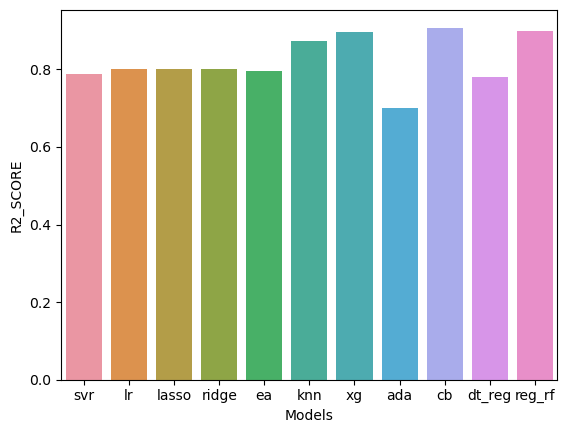

In [148]:
sns.barplot(x='Models', y='R2_SCORE', data=final_data)

# Comparison of Different Models Using Scatter Plot

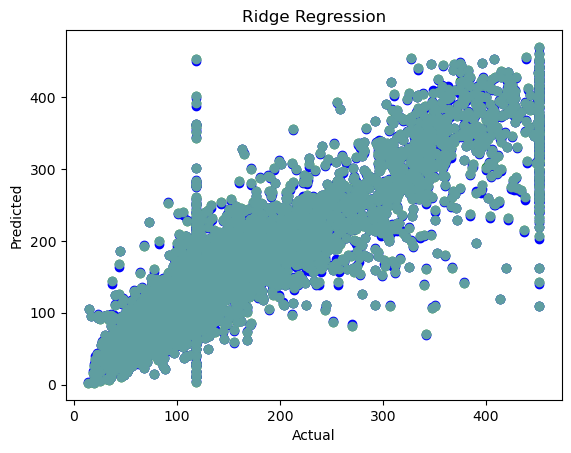

In [118]:
# Plot actual vs predicted values for Decision Tree Regressor
plt.scatter(y_test, y_pred_lr, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regressor')

# Plot actual vs predicted values for Linear Regression
plt.scatter(y_test, y_pred_lasso, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression')

plt.scatter(y_test, y_pred_ridge, color='CadetBlue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression')


plt.show()

# Comparison of Different Models Using Distribution Plot

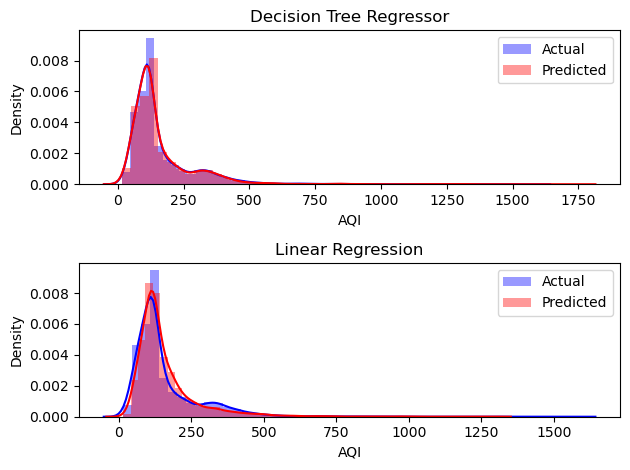

In [58]:
# Create distribution plots for both models
plt.subplot(2, 1, 1)
sns.distplot(y_test, color='blue', label='Actual')
sns.distplot(y_pred_dt_reg, color='red', label='Predicted')
plt.xlabel('AQI')
plt.ylabel('Density')
plt.title('Decision Tree Regressor')
plt.legend()

plt.subplot(2, 1, 2)
sns.distplot(y_test, color='blue', label='Actual')
sns.distplot(y_pred_lr, color='red', label='Predicted')
plt.xlabel('AQI')
plt.ylabel('Density')
plt.title('Linear Regression')
plt.legend()

plt.tight_layout()
plt.show()


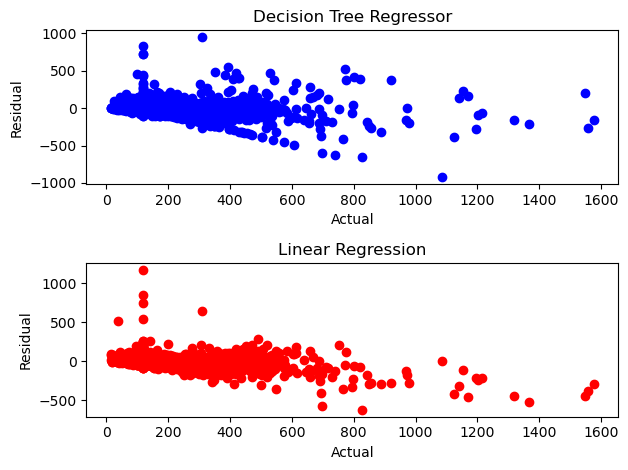

In [57]:
# Create residual plots for both models
plt.subplot(2, 1, 1)
plt.scatter(y_test, y_pred_dt_reg - y_test, color='blue')
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.title('Decision Tree Regressor')

plt.subplot(2, 1, 2)
plt.scatter(y_test, y_pred_lr - y_test, color='red')
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.title('Linear Regression')

plt.tight_layout()
plt.show()